<a href="https://colab.research.google.com/github/woneuy01/AudioToText/blob/master/reddit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference

https://www.storybench.org/how-to-scrape-reddit-with-python

https://towardsdatascience.com/scraping-reddit-data-1c0af3040768

https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/

In [0]:
!pip install praw  

     |████████████████████████████████| 153kB 4.5MB/s 
     |████████████████████████████████| 204kB 13.8MB/s 


In [0]:
import praw
import pandas as pd
import datetime as dt
import numpy as np

In [0]:
reddit = praw.Reddit(client_id='**********', \
                     client_secret='***************', \
                     user_agent='************', \
                     username='******', \
                     password='*********')

In [0]:
# get 10 hottest posts from the covid 19 subreddit

hot_posts = reddit.subreddit('coronavirus').hot(limit=10)

for post in hot_posts:

    print(post.title)

Daily Discussion Post - June 02 | Questions, images, videos, comments, unconfirmed reports, theories, suggestions
Scientific Studies Looking For Participants
A nine-year-old Kenyan boy who made a wooden hand-washing machine to help curb the spread of coronavirus says he is "very happy" after receiving a presidential award
Wuhan tested the entire city of 9,899,829 people in 10 days, found no active case, 300 asymptomatic carriers.
US surgeon general: "Every reason to expect" new Covid-19 clusters following protests
Spain Reports No Virus Deaths for First Time Since March
Leader of Afghan Taliban Said to Be Gravely Ill With the Coronavirus: “Nearly all the Taliban leadership in Doha has the bug,” a senior Afghan official said.
Dr. Anthony Fauci says there’s a chance coronavirus vaccine may not provide immunity for very long
Scientists to choirs: Group singing can spread the coronavirus, despite what CDC may say
Tesla worker tests positive for COVID-19 after New York factory reopens


In [0]:
# get hottest posts from all subreddits

hot_posts = reddit.subreddit('all').hot(limit=10)

for post in hot_posts:

    print(post.title)

Boris Johnson says 3m people in Hong Kong will get path to British citizenship
FBI Finds ‘No Intel Indicating Antifa Involvement’ in Sunday’s Violence
Something to look forward to
An incontrovertible truth on my church’s sign today
Trump Vs. Reality
Work of an anonymous artist, who's known for placing sculptures like these overnight in Amsterdam
AskHistorians is closing to new posts from 8:30 PM EDT to 12 PM EDT tomorrow to protest the reddit admins' providing a home for hate speech.
LA rioter lights firework on the street. Gets it thrown back into his car.
'Remarkable' 16-Year-Old Praised for Leading Peaceful Protests in Detroit: 'I Made a Mark'
Fellow skateboarders help kid get over his fear of going down the ramp.


In [0]:
import pandas as pd

posts = []

ml_subreddit = reddit.subreddit('coronavirus')
# from coronavirus subreddit 
for post in ml_subreddit.hot(limit=10):
      posts.append([post.title, post.score, post.id, 'https://www.reddit.com'+post.permalink,post.subreddit, post.url, post.num_comments, post.selftext, dt.datetime.fromtimestamp(post.created)])
#change created(time) to human readable time
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'permalink','subreddit', 'url', 'num_comments', 'body', 'created'])
posts.to_csv("reddit.csv")
print(posts)


                                               title  ...             created
0  Daily Discussion Post - June 02 | Questions, i...  ... 2020-06-02 21:52:40
1        Scientific Studies Looking For Participants  ... 2020-04-05 01:02:25
2  A nine-year-old Kenyan boy who made a wooden h...  ... 2020-06-03 02:20:50
3  Wuhan tested the entire city of 9,899,829 peop...  ... 2020-06-02 20:06:59
4  US surgeon general: "Every reason to expect" n...  ... 2020-06-03 00:59:42
5  Spain Reports No Virus Deaths for First Time S...  ... 2020-06-02 16:40:39
6  Leader of Afghan Taliban Said to Be Gravely Il...  ... 2020-06-03 04:16:20
7  Dr. Anthony Fauci says there’s a chance corona...  ... 2020-06-03 07:53:20
8  Scientists to choirs: Group singing can spread...  ... 2020-06-02 23:19:03
9  Tesla worker tests positive for COVID-19 after...  ... 2020-06-03 06:07:15

[10 rows x 9 columns]


In [0]:
#print description of the subreddit
print(ml_subreddit.description)

**Welcome to /r/Coronavirus**
-

In December 2019, a novel coronavirus strain (Sars-CoV-2) emerged in the city of Wuhan, China. This subreddit seeks to monitor the spread of the disease COVID-19, declared a PHEIC by the WHO. Please be civil and empathetic. This subreddit is for high quality posts and discussion. 
 
**Here we allow the following types of posts: reputable news sources (this includes, but is not limited to, BBC, BNO, The Guardian, Washington Post, Reuters, Al Jazeera, South China Morning Post, New York Times, Caixin, CDC, etc.), discussion regarding economic impact, societal impact, travel bans, etc.**

**Please flair your post appropriately**
- 
-
---
If you would like to be given a verified flair as a nurse, doctor, science PhD or MSc, please send a modmail with the title "FOR VERIFICATION" to learn more

**Useful Resources:**

- [Donate PPE](https://www.ppecoalition.com/)

- [Global case tracker](https://coronastats.co/)

- [USAFacts Tracker](https://usafacts.org/issue

In [0]:
#permallink is the post link
# we can search the post with id
#posts['permalink'][5]
posts['id'][3]

'gv64e0'

In [0]:
# try one post comments first 
#submission = reddit.submission(url=posts['permalink'][5])
# we can use both permalink and id to find the post
submission = reddit.submission(id=posts['id'][3])

In [0]:
#top_level_comments
submission.comments.replace_more(limit=0)

for top_level_comment in submission.comments:

    print(top_level_comment.body)

Are asymptomatic carriers not considered active cases? Do we know how infectious they are yet?
If you are testing 10 million people for something with low incidence, the false positive and false negative must be massively significant.
 3weeks ago [Wuhan will test its entire population of 11 million after reporting new infections for the first time since its lockdown was lifted](https://www.reddit.com/r/Coronavirus/comments/gi6tz8/wuhan_will_test_its_entire_population_of_11/?utm_medium=android_app&utm_source=share)
So they can test and get results for 10 million people in 10 days, but it takes my test results almost 10 days for just me?
How is this possible? You'd expect far more than 300 false positives from a sample that large.
Is this still a thing. I though covid was watching the riots.
Won't they have to repeat this stunt every time someone tests positive?
They sent 45,000 people to Wuhan to fight the epidemic. That is one for every confirmed case, with a case hospitalisation rate 

In [0]:
comments = set()

In [0]:
# collect top level comment body

submission.comments.replace_more(limit=0)

for top_level_comment in submission.comments:
    comments.add(top_level_comment.body)
    #display.clear_output()
    
print(len(comments))

76


In [0]:
#vader sentiment analysis on reddit comments
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint

nltk.download('vader_lexicon')
sia = SIA()
results = []

for line in comments:
    pol_score = sia.polarity_scores(line)
    pol_score['comment'] = line
    results.append(pol_score)

pprint(results[:7], width=100)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[{'comment': 'People are ready to believe anything coming from Chinese officials?\n'
             '\n'
             "They bear less truth than Trump's tweets.",
  'compound': 0.5434,
  'neg': 0.0,
  'neu': 0.769,
  'pos': 0.231},
 {'comment': 'Are asymptomatic carriers not considered active cases? Do we know how infectious '
             'they are yet?',
  'compound': -0.3855,
  'neg': 0.158,
  'neu': 0.842,
  'pos': 0.0},
 {'comment': 'They sent 45,000 people to Wuhan to fight the epidemic. That is one for every '
             'confirmed case, with a case hospitalisation rate of 10-15% that is drowning the '
             'problem in manpower in order to get it under control.\n'
             '\n'
             'They locked down the country to preserve virus free areas to keep the ability to '
             'shift resources at any costs. Their response seems to be

In [0]:
df1 = pd.DataFrame.from_records(results)
df1.head()

,neg,neu,pos,compound,comment
0,0.000,0.769,0.231,0.5434,People are ready to believe anything coming fr...
1,0.158,0.842,0.000,-0.3855,Are asymptomatic carriers not considered activ...
2,0.072,0.871,0.057,-0.1280,"They sent 45,000 people to Wuhan to fight the ..."
3,0.136,0.388,0.476,0.5423,Yeah idk about trusting Chinese government num...
4,0.000,0.508,0.492,0.9100,Why do people even share these articles and pr...


In [0]:
df1['label'] = 0
df1.loc[df1['compound'] > 0.2, 'label'] = 1
df1.loc[df1['compound'] < -0.2, 'label'] = -1
df1.head()

,neg,neu,pos,compound,comment,label
0,0.000,0.769,0.231,0.5434,People are ready to believe anything coming fr...,1
1,0.158,0.842,0.000,-0.3855,Are asymptomatic carriers not considered activ...,-1
2,0.072,0.871,0.057,-0.1280,"They sent 45,000 people to Wuhan to fight the ...",0
3,0.136,0.388,0.476,0.5423,Yeah idk about trusting Chinese government num...,1
4,0.000,0.508,0.492,0.9100,Why do people even share these articles and pr...,1


In [0]:
df2 = df1[['comment', 'label']]
df2.to_csv('reddit_comment_labels.csv', mode='a', encoding='utf-8', index=False)

In [0]:
print("Positive comments:\n")
pprint(list(df1[df1['label'] == 1].comment)[:5], width=200)

print("\nNegative comments:\n")
pprint(list(df1[df1['label'] == -1].comment)[:5], width=200)
# we can tell positive comments are not that positive in real

Positive comments:

["People are ready to believe anything coming from Chinese officials?\n\nThey bear less truth than Trump's tweets.",
 'Yeah idk about trusting Chinese government numbers',
 "Why do people even share these articles and pretending like it's good news. How can you remotely trust what China share?",
 'Let’s not pretend authoritarianism doesn’t have its benefits.      It’s certainly efficient.',
 'I don’t trust chinas publicly releases data. If they test 10 million people, some might say that there may be up to 50% change of false negatives in some tests, it’s unknown yet because it’s all '
 'new and stuff. \n'
 '\n'
 '\n'
 '_ Several labs, including Slev’s ARUP, are now doing independent validation of antibody tests. Already, there are some early results: a manuscript that hasn’t yet been peer-reviewed or published '
 'from a group of scientists led by the University of California San Francisco and the University of California, Berkeley. Only three of the 14 tests the g

Check how many positive and negative comments we have in total

In [0]:
print(df1.label.value_counts())

print(df1.label.value_counts(normalize=True) * 100)

 1    29
-1    25
 0    22
Name: label, dtype: int64
 1    38.157895
-1    32.894737
 0    28.947368
Name: label, dtype: float64


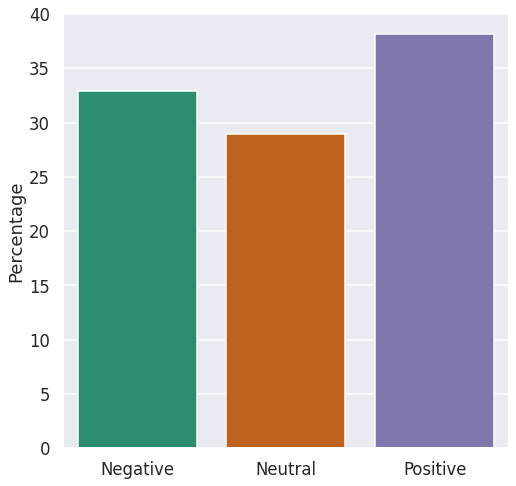

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid', context='talk', palette='Dark2')

fig, ax = plt.subplots(figsize=(8, 8))

counts = df1.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [0]:
submission.comments.replace_more(limit=0)

for comment in submission.comments.list():

    print(comment.body)

Are asymptomatic carriers not considered active cases? Do we know how infectious they are yet?
If you are testing 10 million people for something with low incidence, the false positive and false negative must be massively significant.
 3weeks ago [Wuhan will test its entire population of 11 million after reporting new infections for the first time since its lockdown was lifted](https://www.reddit.com/r/Coronavirus/comments/gi6tz8/wuhan_will_test_its_entire_population_of_11/?utm_medium=android_app&utm_source=share)
So they can test and get results for 10 million people in 10 days, but it takes my test results almost 10 days for just me?
How is this possible? You'd expect far more than 300 false positives from a sample that large.
Is this still a thing. I though covid was watching the riots.
Won't they have to repeat this stunt every time someone tests positive?
They sent 45,000 people to Wuhan to fight the epidemic. That is one for every confirmed case, with a case hospitalisation rate 

Each subreddit has five different ways of organizing the topics created by redditors: .hot, .new, .controversial, .top, and .gilded. You can also use .search("SEARCH_KEYWORDS") to get only results matching an engine search